## 结巴分词及文本内容词云展示
### by liupengyuan[at]pku.edu.cn
### https://github.com/liupengyuan

**1. 简介**

**1.1 分词**

中文句子中词汇之间没有显式的分割，在进行词频处理以及内容分析前，一般需要自动分词。可以完成自动分词(含词性标注)等的工具很多，最常用的：
- LTP（哈工大开发，除分词外，还有很多语言信息处理的功能模块）
- NLPIR（北理工开发，前身为中科院ICTCLAS分词系统，除分词外，还有很多语言信息处理的功能模块）
- jieba分词（以分词词性标注为基本常用功能）

其中jieba分词是纯python开发，这里将以jieba分词的使用为例。

**1.2 词云**

文本内容一个最常用的可视化展示即词云展示，文本中词频越高的词汇，在词云中相对字体越大越明显。有很多在线词云工具(可自行百度)。

这里介绍python的第三方工具包wordcloud，功能齐全，与在线词云工具相比优势是：可以自动批量生成词云。

**2. 分词工具包(结巴)**
- 项目地址：https://github.com/fxsjy/jieba
结巴分词是国人开发的优秀python分词工具包，便于使用。

windows下安装：
- 进入powershell
- pip install jieba

进入jupyter notebook，执行import jieba，如果没有出错，则表明该工具包已经被正确安装

**2.1 基本使用**

**2.1.1 分词**

In [3]:
# encoding=utf-8
import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


- 以上实例来自其官网
- 我们一般使用其缺省模式，即第二种模式

**2.1.2 词性标注**

In [1]:
import jieba.posseg as pseg
words = pseg.cut("北京语言大学汉研中心")
for word, flag in words:
    print('{} {}'.format(word, flag))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 1.254 seconds.
Prefix dict has been built succesfully.


北京 ns
语言 n
大学 n
汉 j
研 vn
中心 n


- 其中的词性标记，采用和ictclas兼容的标记法（词性标记集）
- 其中'汉研'没有被正确切分

In [4]:
jieba.suggest_freq('汉研', tune=True)
words = pseg.cut("北京语言大学汉研中心")
for word, flag in words:
    print('{} {}'.format(word, flag))

北京 ns
语言 n
大学 n
汉研 x
中心 n


- 利用suggest_freq，调整'汉研'，使之能够被正确切分
- 更好的办法是使用自定义词典，具体方法请参见其官网介绍：https://github.com/fxsjy/jieba 

**3. 词云工具包(wordcloud)**

该项目地址：https://github.com/amueller/word_cloud

windows下安装：
- 下载 http://yunpan.blcu.edu.cn:80/link/294855A5A760AC53797C1683E2934F59 并安装(针对python3.4以上)
- 进入powershell
- pip install wordcloud

进入jupyter notebook，执行import wordcloud，如果没有出错，则表明该工具包已经被正确安装

**3.1 极简词云**

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

导入必要的包

In [33]:
text = 'The quick brown fox jumps over the lazy dog'

<class 'wordcloud.wordcloud.WordCloud'>


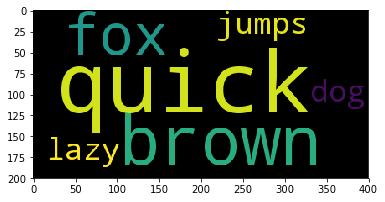

In [4]:
wc = WordCloud()
wc.generate(text)
plt.imshow(wc)
plt.show()

- `wc = WordCloud()`，声明一个WordCloud对象
- `wc.generate(text)`，调用WordCloud对象的generate(str)方法，参数是一个字符串，可以生成该字符串的词云
- `plt.imshow(wc)`，调用plt的imshow()函数，将wc词云载入(imshow即image show简写)
- `plt.show()`，显示当前被载入的图片

至此，一个极简词云已经完成。

**3.2 词云基本设置与使用**

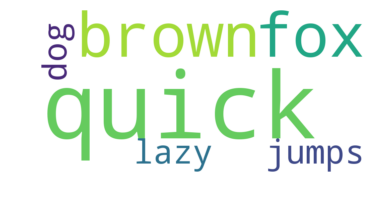

In [34]:
wc = WordCloud(background_color='white', width = 1000, height = 500)
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
wc.to_file('first.png')
plt.show()

- `background_color='white'`，将背景色设为白色
- `width = 1000, height = 500`，设置图片宽与高
- `plt.axis('off')`，关闭坐标轴
- `wc.to_file('first.png')`，WordCloud对象的`to_file()`方法，将图片保存

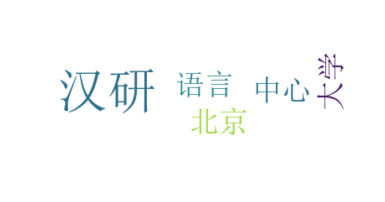

In [36]:
text = '北京 语言 大学 汉研 汉研 汉研 汉研 汉研 中心'
local_font_path = r'C:\Windows\Fonts\simsun.ttc'
wc = WordCloud(font_path=local_font_path, background_color='white')
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

- `font_path=local_font_path`，给出中文字体
- `interpolation='bilinear'`，利用线性插值是字体缩放平滑

**4 实例**

任务：利用抓取的www.163.com 首页新闻文本，制作词云

In [2]:
import jieba
import re
import numpy as np
# from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

引入需要用的各种包

In [3]:
with open(r'news_163_home.txt', encoding = 'utf-8') as f:
    txt = f.read()
seg_list = jieba.cut(txt)

读取文本文件，切词

In [4]:
with open(r'stopwords.dat', encoding = 'utf-8') as f:
    stopwords = set(f.read())

读取停用词文件，并形成停用词词表

In [6]:
clean_seg_list = []
for seg in seg_list:
    if re.search(r'[\u4e00-\u9fa5]+', seg) and seg not in stopwords:
        clean_seg_list.append(seg)
text = ' '.join(clean_seg_list)

323182

- 过滤掉非中文词和停用词
- 用空格链接成一个字符串

In [8]:
font_path = r'C:\Windows\Fonts\simsun.ttc'
wc = WordCloud(font_path=font_path,background_color="white")
wc.generate(text);

生成词云

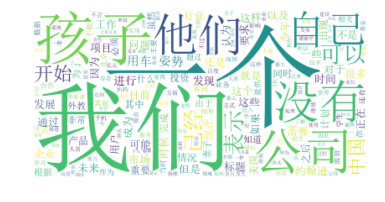

In [9]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
wc.to_file('first.png')
plt.show()

显示词云

In [10]:
pic = np.array(Image.open('miao.png'))
wc = WordCloud(font_path=font_path,background_color="white", mask=pic)
wc.generate(text);

- `np.array(Image.open('miao.png'))`，将图片文件读入，存入到numpy的ndarry对象pic
- `mask=pic`，将pic设为模板，生成一个wc词云画布
- 生成词云

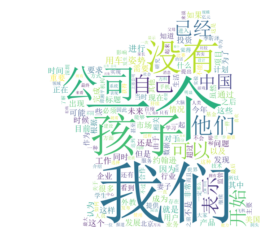

In [15]:
wc.to_file('second.png')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

显示词云，并输出文件